# The Sparks Foundation 
## Task 1 : Prediction using Supervised ML
### To predict the percentage of marks of the students based on the number of hours they studied. 

### Author : Priyam Mahajan 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# Reading the Data 
df = pd.read_csv('http://bit.ly/w-data')
data.head(5)

In [37]:
# Checking if data is null 
df.info()
df.isnull == True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


False

### There are no null values in the dataset. 

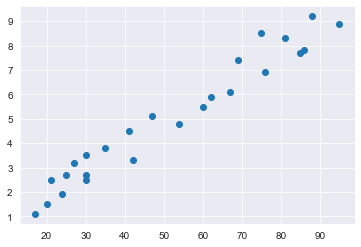

In [38]:
#Plotting the dataset. 

plt.scatter(df['Scores'], df['Hours'])

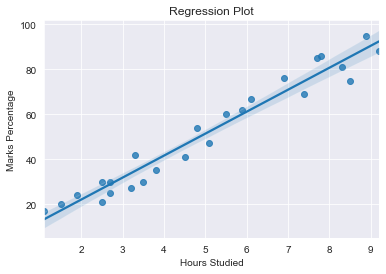

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [39]:
#Checking if correlation is postive or negative. 
#Plotting graph 
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot')
plt.ylabel('Marks Percentage')
plt.xlabel('Hours Studied')
plt.show()
print(data.corr())

### Positive correlation between variables confirmed. 

### Training the Model

In [46]:
# 1. Splitting the Data 
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2,random_state=0)

In [56]:
#Double checking the size of test and train data. 
len(X_train)
len(X_test)

20

In [58]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [66]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [82]:
#Fitting the model 

reg.fit(X_train, y_train)
print('Training complete ! ')

Training complete ! 


In [84]:
#making predictions based on the model.
pred_y = reg.predict(X_test)

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [89]:
#Comparing actual vs predicted data. 

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': pred_y})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


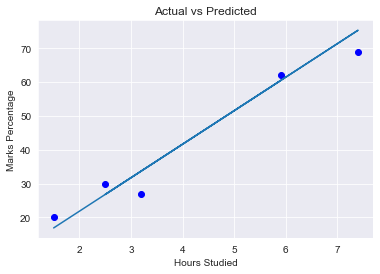

In [101]:
# Plotting actual vs predicted data
plt.scatter(x = X_test, y = y_test, color = 'blue')
plt.plot(X_test, pred_y)
plt.title('Actual vs Predicted')
plt.ylabel('Marks Percentage')
plt.xlabel('Hours Studied')
plt.show()

### Evaluating the model. 

In [110]:
#Checking accuracy score of model 

reg.score(X_test, y_test)

0.9454906892105356

In [103]:
#Checking accuracy of model 
from sklearn.metrics import mean_absolute_error

print('Mean absolute error: ',mean_absolute_error(y_test,pred_y))


Mean absolute error:  4.183859899002975


 ### Predicting the score of a student who has studied for 9.25 hours/day

In [108]:
hours = [9.25]
req_pred = reg.predict([hours])
print("Predicted Score = {}".format(round(req_pred[0],3)))


Predicted Score = 93.692


### Therefore according to this model if a student studies for 9.25 hours/day, they are likely tos core 93.692 % marks.